In [7]:
#loading train.csv dataset
#below command was used to install seaborn
#pip install seaborn 
import csv
import pprint
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')
data = list(csv.DictReader(open('train.csv')))

#checking if the dataset was loaded
pprint.pprint(data[0])

OrderedDict([('datetime', '2011-01-01 00:00:00'),
             ('season', '1'),
             ('holiday', '0'),
             ('workingday', '0'),
             ('weather', '1'),
             ('temp', '9.84'),
             ('atemp', '14.395'),
             ('humidity', '81'),
             ('windspeed', '0'),
             ('casual', '3'),
             ('registered', '13'),
             ('count', '16')])


In [8]:
import numpy as np
DEFAULT_VALUE = np.nan
#replace intgers 1-4 to Spring, Summer, Fall and Winter
def cleanSeason(data, column_key, convert_function, default_value):
    special_values= { '1' : 'Spring', '2' : 'Summer', '3' : 'Fall', '4' : 'Winter' }
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

#replace boolean values 0 and 1 to No and Yes
def cleanHoliday(data, column_key, convert_function, default_value):
    special_values= { '0' : 'No', '1' : 'Yes' }
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

#replace boolean values 0 and 1 to No and Yes       
def cleanWorkingday(data, column_key, convert_function, default_value):
    special_values= { '0' : 'No', '1' : 'Yes' }
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

#replace integer values 1-4 to clear or few clouds, mist and cloudy, light snow or rain and heavy rain or snow.
def cleanWeather(data, column_key, convert_function, default_value):
    special_values= { '1' : 'clear or few clouds', '2' : 'mist and cloudy', '3' : 'light snow or rain', '4' : 'heavy rain or snow' }
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
            if old_value in special_values.keys():
                new_value = special_values[old_value]
            else:
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

In [9]:
cleanSeason(data, "season", int, DEFAULT_VALUE) #clean values in season
cleanHoliday(data, "holiday", str.strip, DEFAULT_VALUE) #clean values in holiday
cleanWorkingday(data, "workingday", str.strip, DEFAULT_VALUE) #clean values in workingday
cleanWeather(data, "weather", str.strip, DEFAULT_VALUE) #clean values in weather

In [10]:
import pandas as pd
cleanedList = data
pd = pd.DataFrame(data)
pd.to_csv("train_cleaned.csv", index=False ) # save it to new dataset csv file after data cleaning

In [11]:
import pandas as pd
train = pd.read_csv("train_cleaned.csv", parse_dates=["datetime"]) # read the new dataset by uisng pandas
train.shape #check the size

(10886, 12)

In [12]:
train.head() # view and double check values in the new dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,No,No,clear or few clouds,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,Spring,No,No,clear or few clouds,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,No,No,clear or few clouds,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,No,No,clear or few clouds,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,Spring,No,No,clear or few clouds,9.84,14.395,75,0.0,0,1,1


In [13]:
train.info() # check types of each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null object
holiday       10886 non-null object
workingday    10886 non-null object
weather       10886 non-null object
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.6+ KB


In [14]:
train.temp.describe() # calculate mean, std, min and max for temp.

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [15]:
train.isnull().sum() # checking missing/null values for each variable

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [16]:
#Adding 4 more variables based on the "datetime"
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["dayofweek"] = train["datetime"].dt.dayofweek.replace([0,1,2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
train["hour"] = train["datetime"].dt.hour

In [17]:
train.head(100) #checking if the 4 new variables are created and added

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
0,2011-01-01 00:00:00,Spring,No,No,clear or few clouds,9.84,14.395,81,0.0000,3,13,16,2011,1,Saturday,0
1,2011-01-01 01:00:00,Spring,No,No,clear or few clouds,9.02,13.635,80,0.0000,8,32,40,2011,1,Saturday,1
2,2011-01-01 02:00:00,Spring,No,No,clear or few clouds,9.02,13.635,80,0.0000,5,27,32,2011,1,Saturday,2
3,2011-01-01 03:00:00,Spring,No,No,clear or few clouds,9.84,14.395,75,0.0000,3,10,13,2011,1,Saturday,3
4,2011-01-01 04:00:00,Spring,No,No,clear or few clouds,9.84,14.395,75,0.0000,0,1,1,2011,1,Saturday,4
5,2011-01-01 05:00:00,Spring,No,No,mist and cloudy,9.84,12.880,75,6.0032,0,1,1,2011,1,Saturday,5
6,2011-01-01 06:00:00,Spring,No,No,clear or few clouds,9.02,13.635,80,0.0000,2,0,2,2011,1,Saturday,6
7,2011-01-01 07:00:00,Spring,No,No,clear or few clouds,8.20,12.880,86,0.0000,1,2,3,2011,1,Saturday,7
8,2011-01-01 08:00:00,Spring,No,No,clear or few clouds,9.84,14.395,75,0.0000,1,7,8,2011,1,Saturday,8
9,2011-01-01 09:00:00,Spring,No,No,clear or few clouds,13.12,17.425,76,0.0000,8,6,14,2011,1,Saturday,9


/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'number of rentals'), Text(0.5,1,'Rentals per hour')]

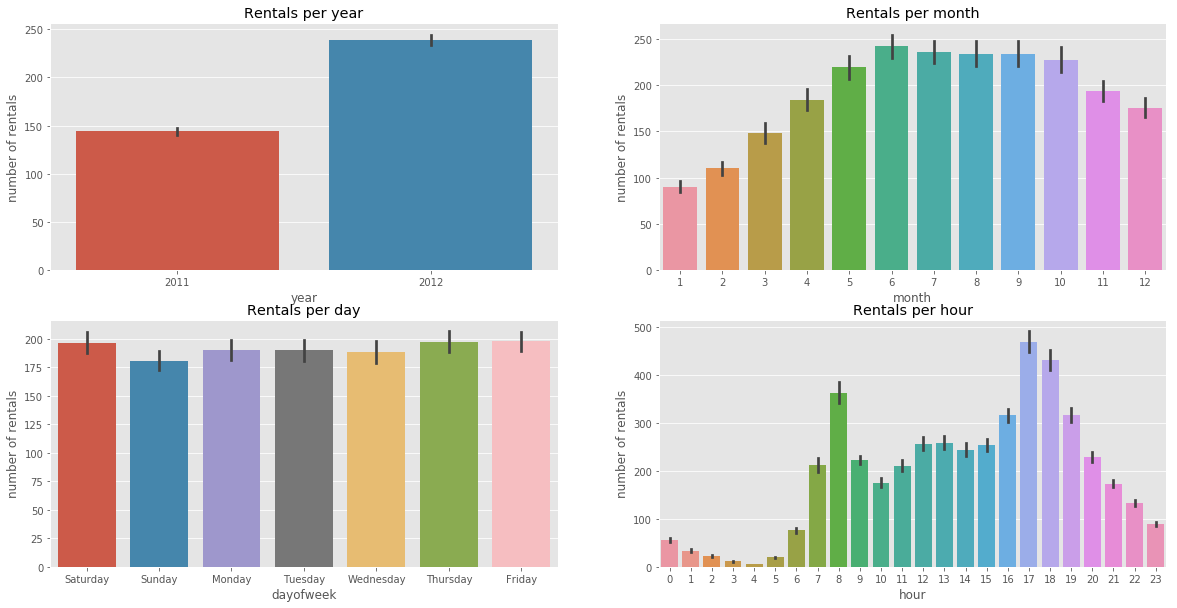

In [18]:
#Exploratory analysis, visualisation, summurisation
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20, 10)
#Drawing barplot using seaborn
sns.barplot (data = train, x='year', y='count', ax = ax1).set(ylabel='number of rentals', title ="Rentals per year")
sns.barplot (data = train, x='month', y='count', ax = ax2).set(ylabel='number of rentals', title ="Rentals per month")
sns.barplot (data = train, x='dayofweek', y='count', ax = ax3).set(ylabel='number of rentals', title ="Rentals per day")
sns.barplot (data = train, x='hour', y='count', ax = ax4).set(ylabel='number of rentals', title ="Rentals per hour")

[Text(0,0.5,'number of rentals'), Text(0.5,1,'Rentals on holiday?')]

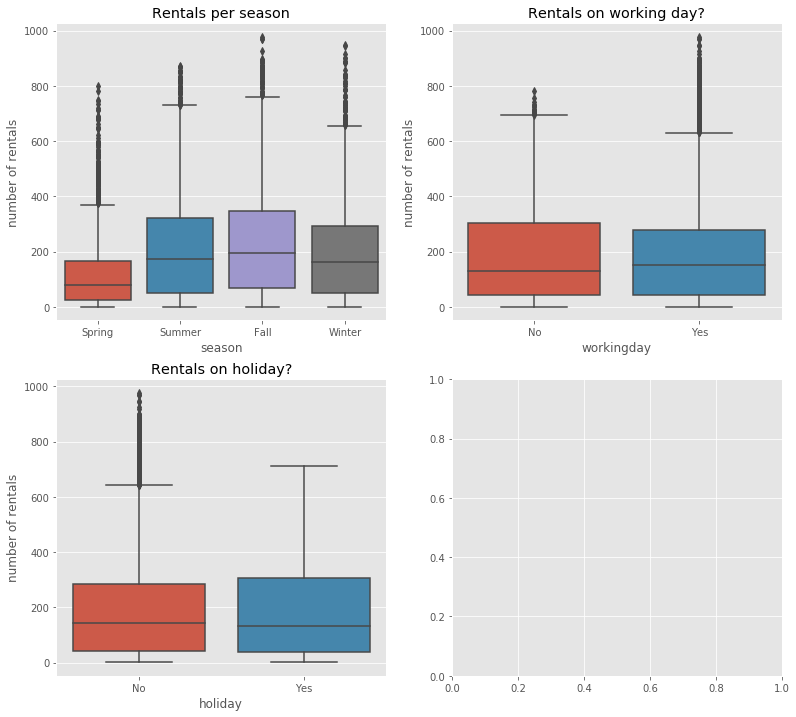

In [19]:
#Exploratory analysis, visualisation, summurisation
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2)
figure.set_size_inches(13, 12)
#drawing boxplot using seaborn
sns.boxplot(data=train, y="count", x="season", orient="v", ax=ax1).set(ylabel='number of rentals', title ="Rentals per season")
sns.boxplot(data=train, y="count", x="workingday", orient="v", ax=ax2).set(ylabel='number of rentals', title ="Rentals on working day?")
sns.boxplot(data=train, y="count", x="holiday", orient="v", ax=ax3).set(ylabel='number of rentals', title ="Rentals on holiday?")

/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'number of rentals'), Text(0.5,1,'Rentals during season')]

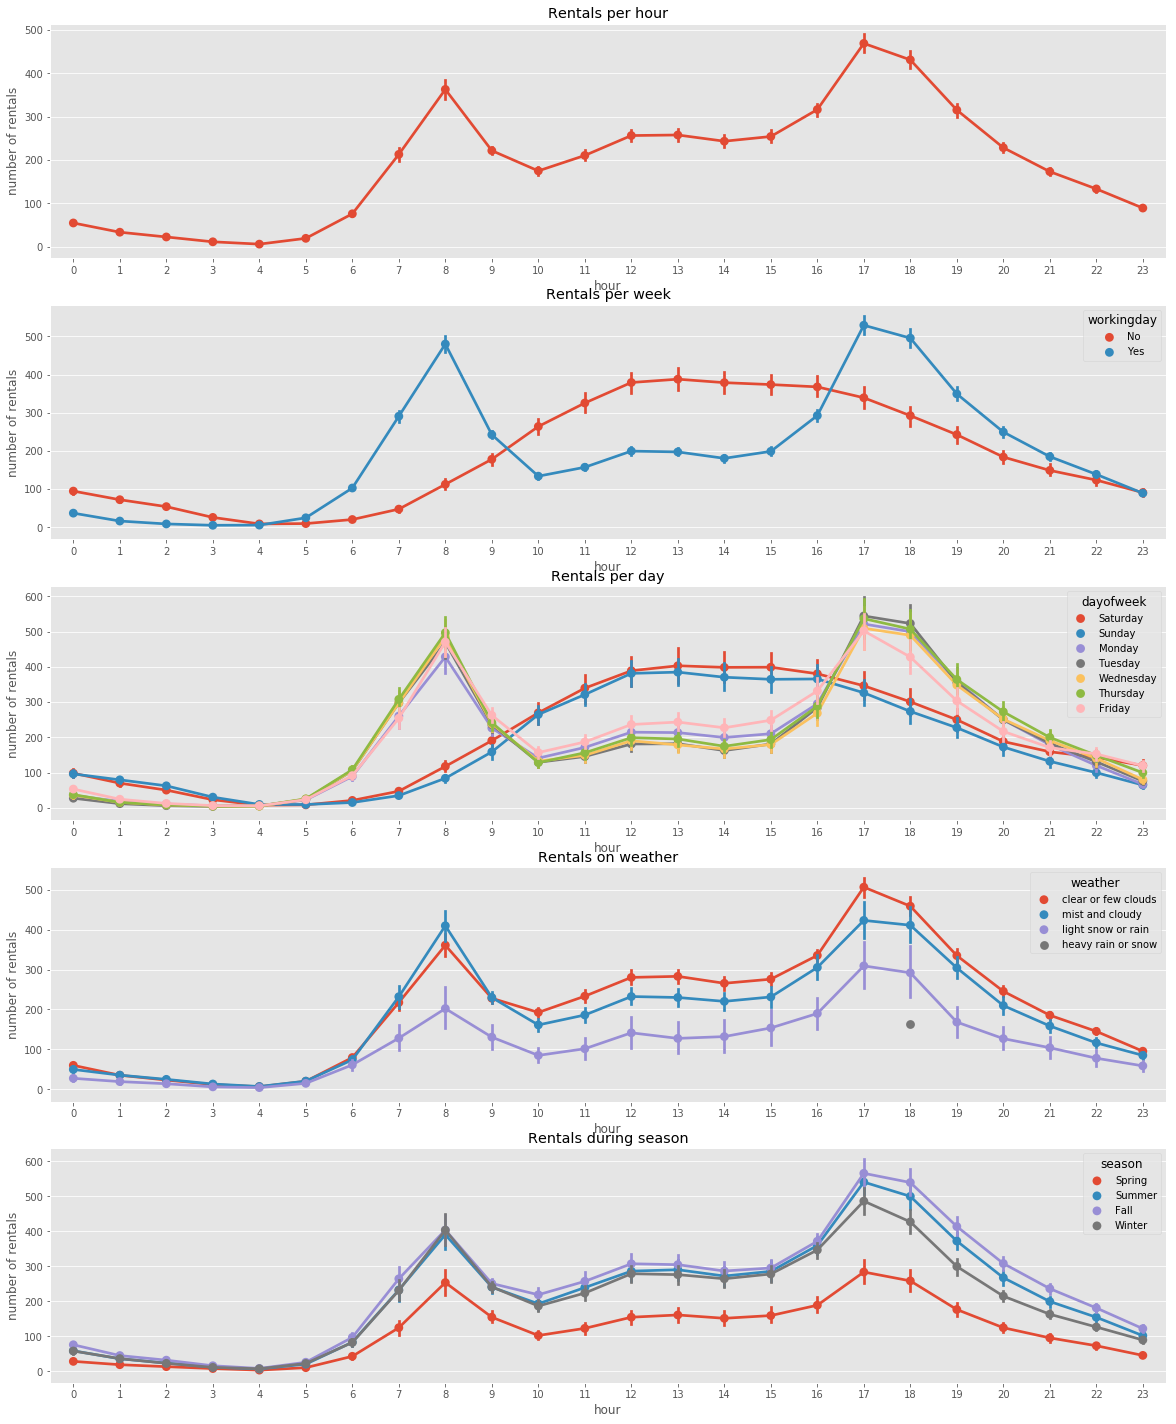

In [32]:
#Exploratory analysis, visualisation, summurisation
figure, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(nrows=5)
figure.set_size_inches(20, 25)
#drawing pointplot using seaborn
sns.pointplot(data=train, x="hour", y="count", ax=ax1).set(ylabel='number of rentals', title ="Rentals per hour")
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2).set(ylabel='number of rentals', title ="Rentals per week")
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3).set(ylabel='number of rentals', title ="Rentals per day")
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4).set(ylabel='number of rentals', title ="Rentals on weather")
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5).set(ylabel='number of rentals', title ="Rentals during season")